In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


Predict the price of the Uber ride from a given pickup point to
the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression
models.
Evaluate the models and compare their respective scores like R2,
RMSE, etc.

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Tanmay49/SEM7/main/ML/uber.csv')


In [25]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [48]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [27]:
df = df.drop(['Unnamed: 0' , 'key'] , axis = 1)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [28]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x12a0691c0>,
 'caps': [<matplotlib.lines.Line2D at 0x12a069760>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a069010>],
 'medians': [<matplotlib.lines.Line2D at 0x12a069ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a069f40>],
 'means': []}

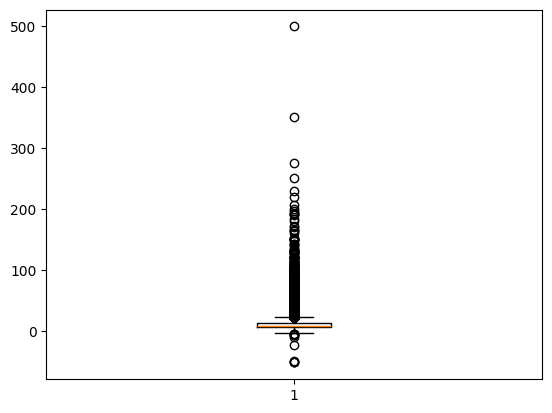

In [29]:
df.info()
plt.boxplot(df["fare_amount"])

In [ ]:
q1 = df["fare_amount"].quantile(0.25)
q3 = df["fare_amount"].quantile(0.75)


df = df[(df["fare_amount"] > q1) & (df["fare_amount"]<q3)]



<Axes: ylabel='fare_amount'>

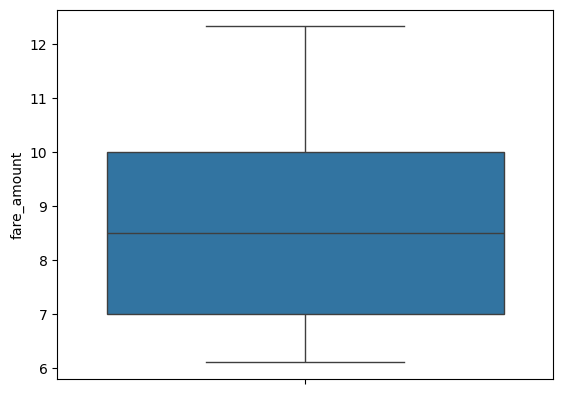

In [33]:
sns.boxplot(df["fare_amount"])

<Axes: >

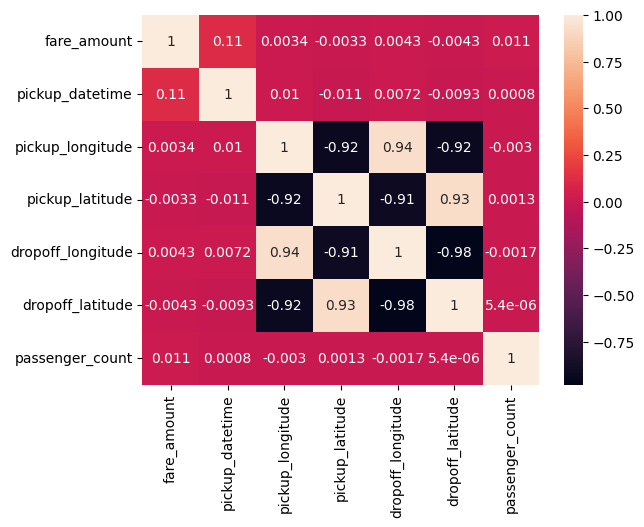

In [37]:
corr = df.corr()
sns.heatmap(corr , annot = True)

In [49]:
from sklearn.model_selection import train_test_split
x = df.drop('fare_amount' , axis = 1)
y =  df['fare_amount']
x['pickup_datetime'] = pd.to_numeric(x['pickup_datetime']) #will give error as timestamp not allowed to be given to the model
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state=29)


In [50]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)



In [52]:
from sklearn.metrics import mean_squared_error , r2_score
RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
print("RMSE : " , RMSE)
R2 = r2_score(y_test , y_pred)
print("R2 : " , R2)

RMSE :  1.7023505348872294
R2 :  0.011811774397035957


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)


RMSE ->  1.250363353019426
R2 ->  0.46689327051839
